In [8]:
import locale
import re
import json

from pathlib import Path
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pywt
import seaborn as sns

from fau_colors import cmaps
from mpl_toolkits import mplot3d


import sys
import os
import neurokit2 as nk
sys.path.append(
    os.path.abspath(
        "/Users/Philipp/git/ba-philipp-doerfler/Code/respiration_extraction/respiration_extraction/datasets/"
    )
)
from respiration_extraction.datasets._bachelor_respiration_dataset_raw import *
from respiration_extraction.algorithms.ecg.extraction import *
from respiration_extraction.algorithms.ecg.estimation_rr import *
from respiration_extraction.algorithms.ecg.fusion_rr import *
from respiration_extraction.algorithms.imu.extraction import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
base_path = Path("/Users/Philipp/git/ba_resp_dataset/subjects/philipp_dataset")
ba_dataset = BachelorRespirationDatasetRaw(data_path=base_path, exclude_missing=True)

# Chapter 4 Methods

## Data Aquisition

In [10]:
#Select Subject and phase
phase = ba_dataset.get_subset(Subject="05", Phase = "Metronome Breathing")

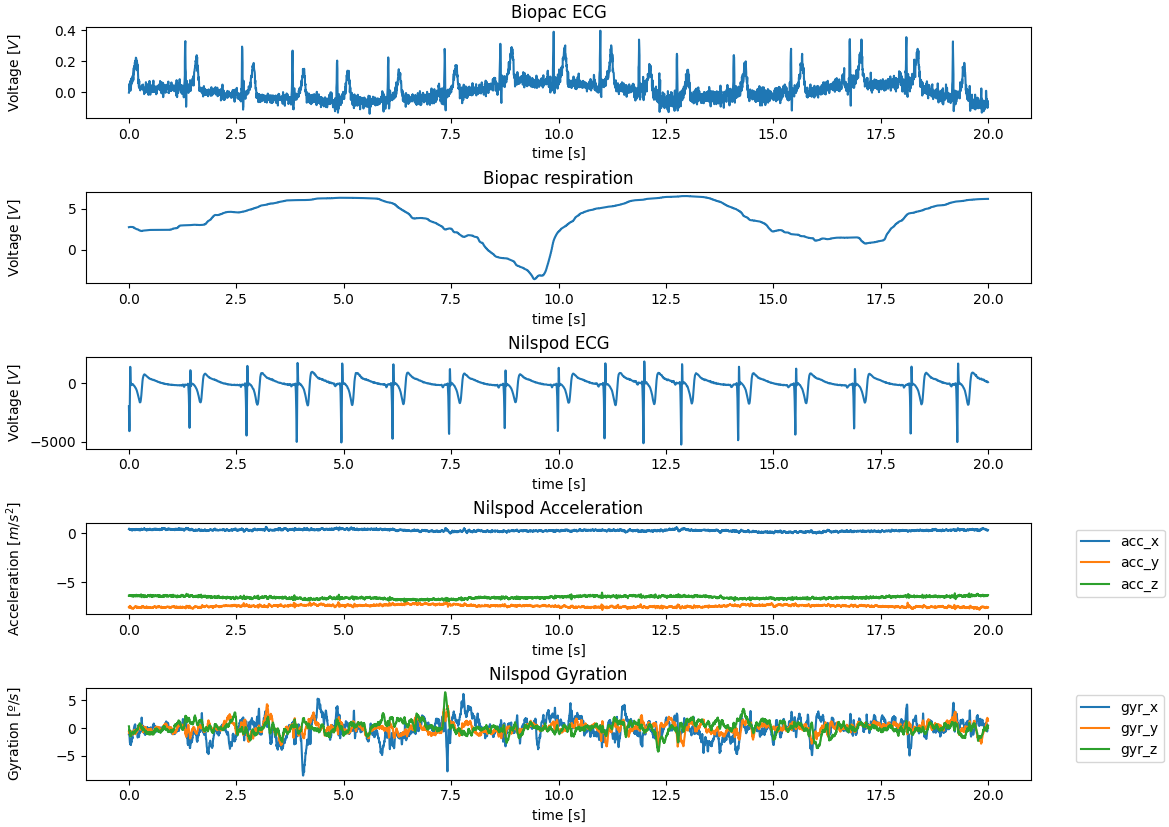

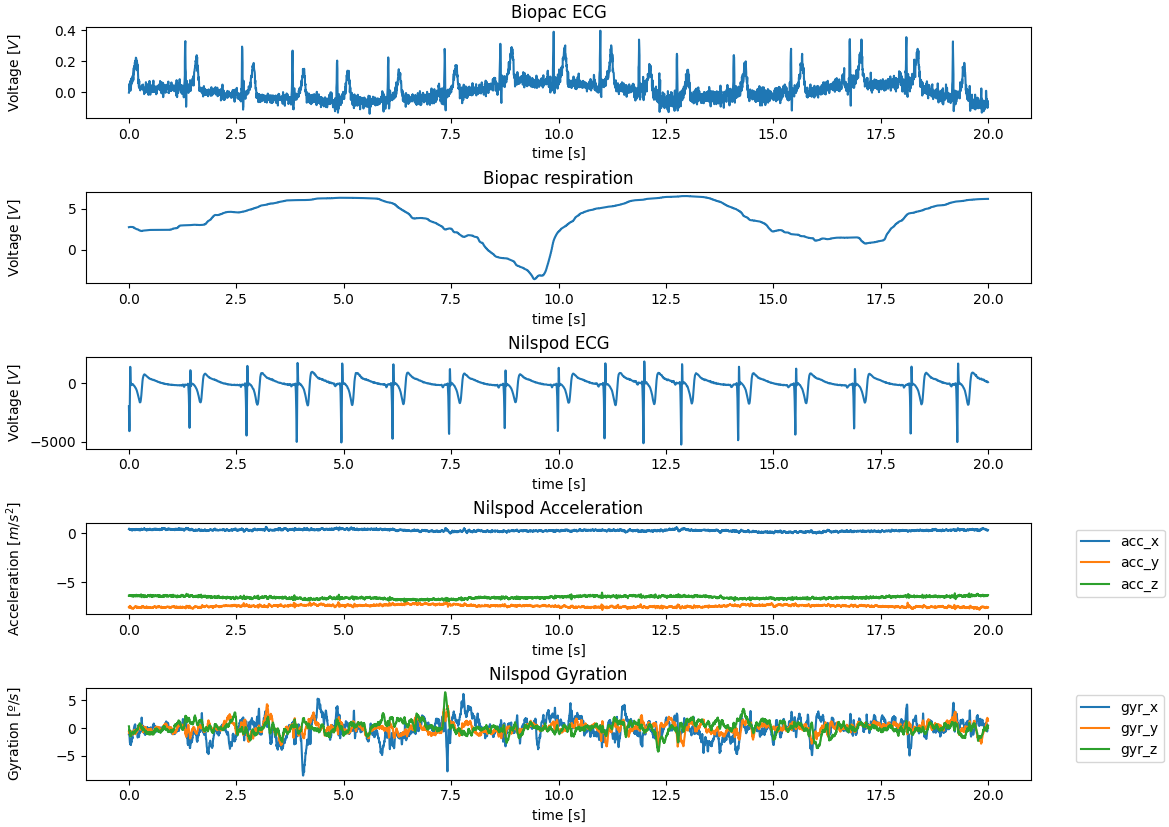

In [11]:
# Show all Datastreams
index = (phase.respiration.index - phase.respiration.index[0]).total_seconds()
limit_biopac = 250 * 20
limit_nils = 256 * 20
ecg = phase.biopac_ecg
respiration = phase.respiration

nils_index = (phase.ecg.index - phase.ecg.index[0]).total_seconds()
nils_ecg = phase.ecg
nils_acc = phase.acc
nils_gyr = phase.gyr
plt.style.use("default")
fig, axs = plt.subplots(nrows=5, layout="constrained")

axs[0].plot(index[:limit_biopac], ecg[:limit_biopac], label="ECG")
axs[0].set_ylabel("Voltage [$V$]")
axs[0].set_title("Biopac ECG")

axs[1].plot(index[:limit_biopac], respiration[:limit_biopac], label="biopac_resp")
axs[1].set_title("Biopac respiration")
axs[1].set_ylabel("Voltage [$V$]")

axs[2].plot(nils_index[:limit_nils], nils_ecg[:limit_nils], label="nils_ecg")
axs[2].set_title("Nilspod ECG")
axs[2].set_ylabel("Voltage [$V$]")

axs[3].plot(nils_index[:limit_nils], nils_acc[:limit_nils], label =["acc_x", "acc_y", "acc_z"])
axs[3].set_title("Nilspod Acceleration")
axs[3].set_ylabel("Acceleration [$m/s^2$]")
axs[3].legend(bbox_to_anchor=(1.04,1), loc="upper left")

axs[4].plot(nils_index[:limit_nils], nils_gyr[:limit_nils], label =["gyr_x", "gyr_y", "gyr_z"])
axs[4].set_title("Nilspod Gyration")
axs[4].set_ylabel("Gyration [$º/s$]")
axs[4].legend(bbox_to_anchor=(1.04,1), loc="upper left")

for x in range(0,5):
    axs[x].set_xlabel("time [s]")

file="/Users/Philipp/git/ba-philipp-doerfler/Thesis/BA_Philipp_Doerfler/img/datastreams.pdf"
fig.align_ylabels()
fig.set_size_inches(11.69,8.27)
fig.savefig(file)

## Data Processing


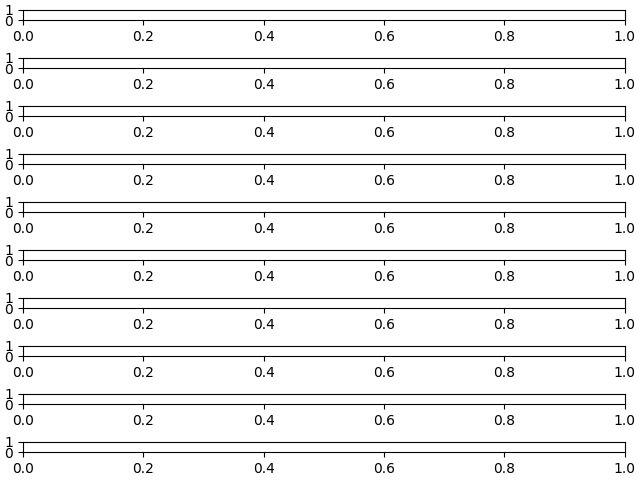

In [12]:
extraction_fig, axs = plt.subplots(nrows=10, layout="constrained")
phase = ba_dataset.get_subset(Subject="08", Phase = "Metronome Breathing")
index = phase.biopac_ecg.index

### Lindeberg

Text(0, 0.5, 'Voltage [$V$]')

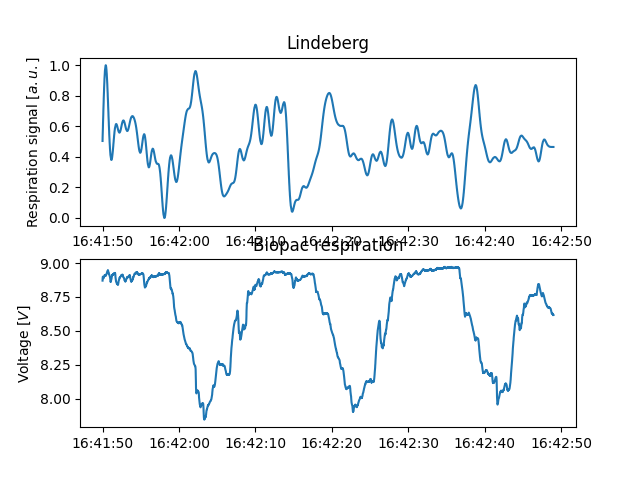

In [14]:
phase = ba_dataset.get_subset(Subject="10", Phase="4-7-8 breathing")
extraction = ExtractionLindeberg()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[0].set_xlabel("time [$s$]")

algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("Lindeberg")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

  0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/q9/ht6p9myd0cbfc_13b55j5z240000gn/T/ipykernel_83833/2562481325.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


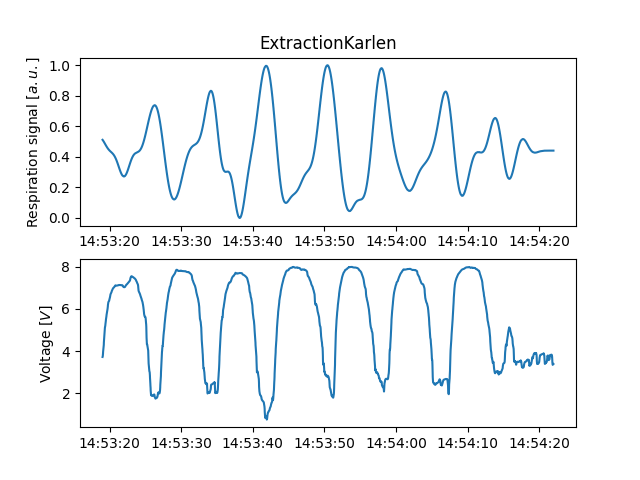

In [15]:
phase = ba_dataset.get_subset(Subject="13", Phase="Metronome Breathing")
extraction = ExtractionKarlen()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[1].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[1].set_xlabel("time [$s$]")

algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("ExtractionKarlen")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")

algo_ax[1].set_ylabel("Voltage [$V$]")
fig.tight_layout()

### Orphiandou

  0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'Voltage [$V$]')

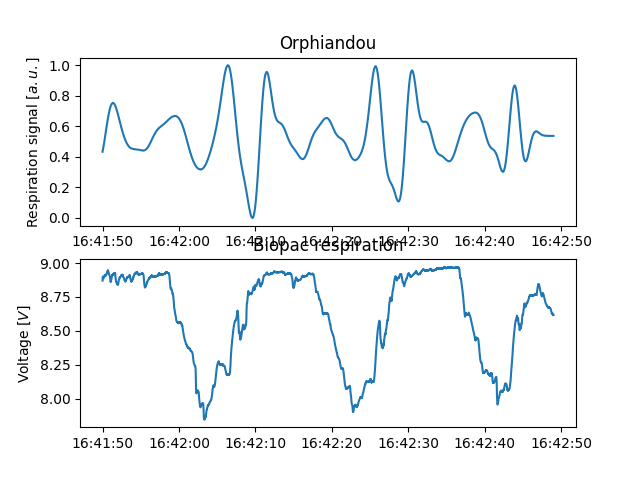

In [16]:
phase = ba_dataset.get_subset(Subject="10", Phase="4-7-8 breathing")
extraction = ExtractionOrphandiou()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[2].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[2].set_xlabel("time [$s$]")


algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("Orphiandou")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

### Addisson

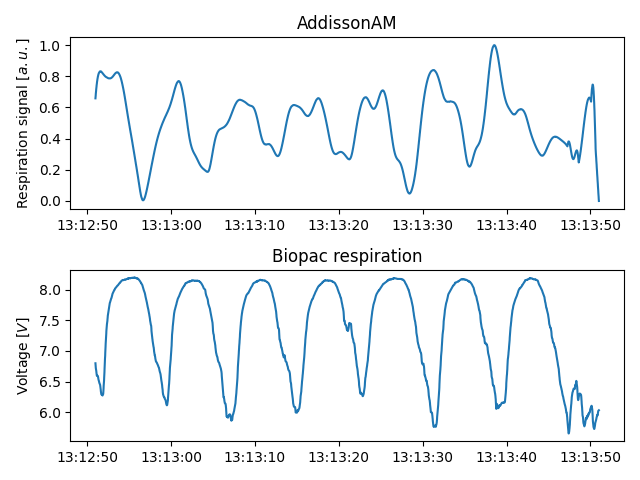

In [17]:
phase = ba_dataset.get_subset(Subject="06", Phase="Metronome Breathing")
extraction = ExtractionAddisonAM()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[3].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[3].set_xlabel("time [$s$]")




algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("AddissonAM")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

algo_fig.tight_layout()



Text(0, 0.5, 'Voltage [$V$]')

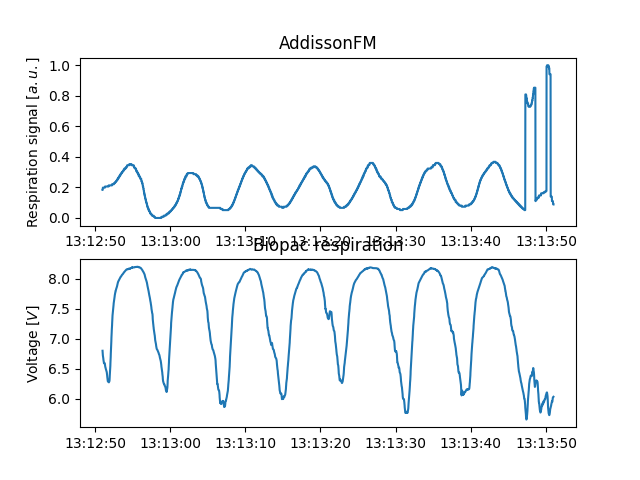

In [11]:
phase = ba_dataset.get_subset(Subject="06", Phase="Metronome Breathing")
extraction = ExtractionAddisonFM()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[4].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])

axs[4].set_xlabel("time [$s$]")


algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("AddissonFM")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

### Charlton

  0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'Voltage [$V$]')

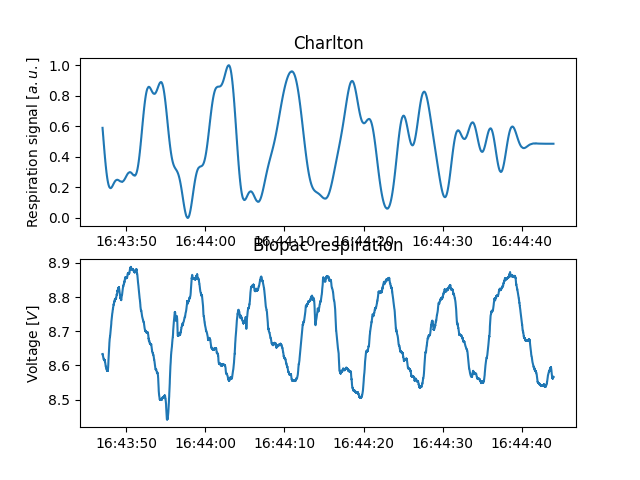

In [12]:
phase = ba_dataset.get_subset(Subject="10", Phase="Metronome Breathing")
extraction = ExtractionCharlton()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[5].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[5].set_xlabel("time [$s$]")

algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("Charlton")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

### Sarkar

Text(0, 0.5, 'Voltage [$V$]')

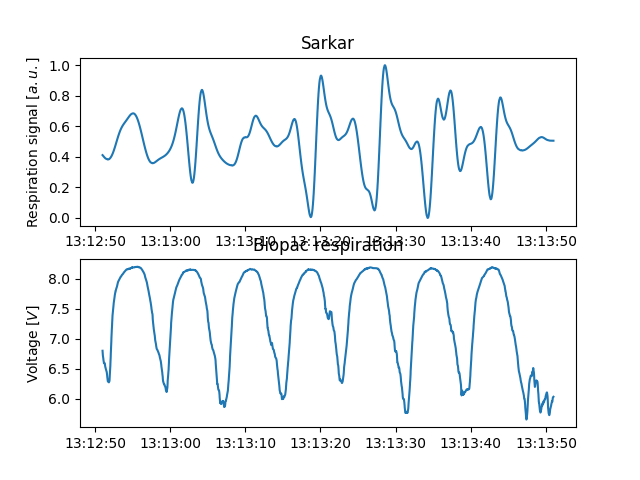

In [13]:
phase = ba_dataset.get_subset(Subject="06", Phase="Metronome Breathing")
extraction = ExtractionSarkar2015()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[6].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[6].set_xlabel("time [$s$]")


algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("Sarkar")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

### Soni

Text(0, 0.5, 'Voltage [$V$]')

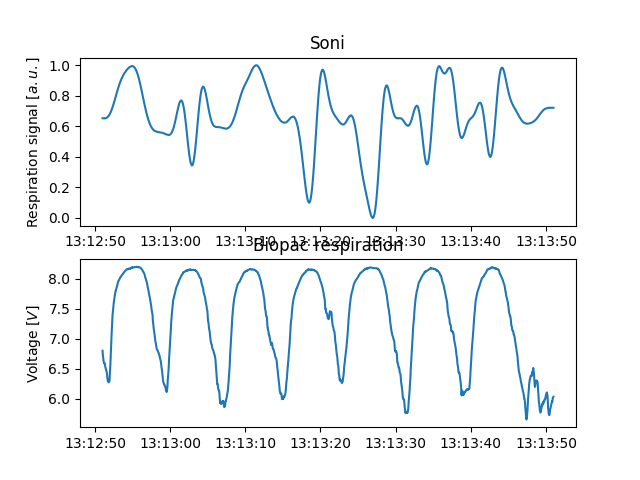

In [14]:
phase = ba_dataset.get_subset(Subject="06", Phase="Metronome Breathing")
extraction = ExtractionSoni2019()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[7].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[7].set_xlabel("time [$s$]")

algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("Soni")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

### Vangent

Text(0, 0.5, 'Voltage [$V$]')

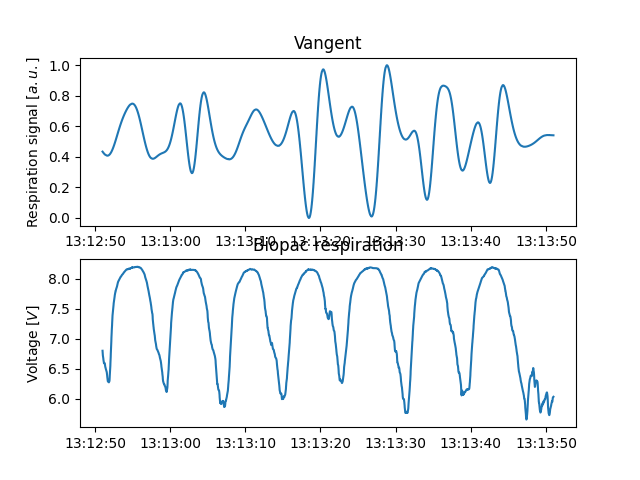

In [15]:
phase = ba_dataset.get_subset(Subject="06", Phase="Metronome Breathing")
extraction = ExtractionVangent2019()
extraction.extract(phase.biopac_ecg, sampling_rate=phase.sampling_rate_biopac)
axs[8].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0])
axs[8].set_xlabel("time [$s$]")

algo_fig, algo_ax = plt.subplots(2)
algo_ax[0].plot(phase.biopac_ecg.index, extraction.respiratory_signal.iloc[:,0], label="Respiration")
algo_ax[0].set_ylabel("Respiration signal [$a.u.$]")
algo_ax[0].set_title("Vangent")

algo_ax[1].plot(phase.respiration.index, phase.respiration, label="biopac_resp")
algo_ax[1].set_title("Biopac respiration")
algo_ax[1].set_ylabel("Voltage [$V$]")

In [16]:
phase = ba_dataset.get_subset(Subject="06", Phase="Metronome Breathing")
axs[9].plot(phase.respiration.index,phase.respiration)
axs[9].set_xlabel("time [$s$]")


Text(0.5, -1.3885555555555538, 'time [$s$]')

In [17]:
file="/Users/Philipp/git/ba-philipp-doerfler/Thesis/BA_Philipp_Doerfler/img"
extraction_fig.align_ylabels()
extraction_fig.set_size_inches(11.69*2,8.27*2)
extraction_fig.savefig(file)

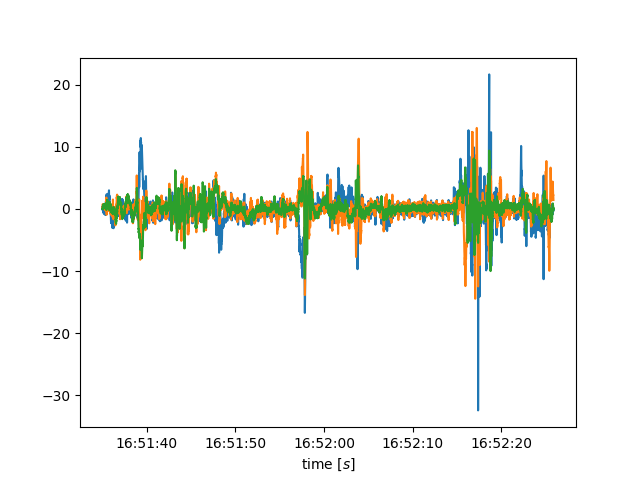

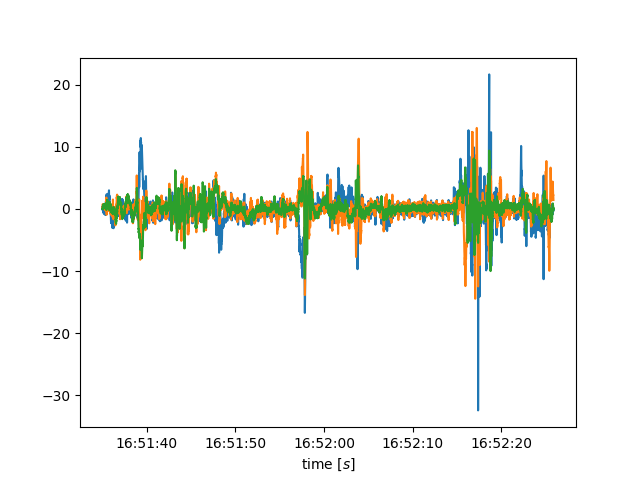

In [18]:
phase = ba_dataset.get_subset(Subject="10", Phase="Hyperventilation")
a, b = plt.subplots()
b.plot(phase.ecg.index,phase.gyr)
b.set_xlabel("time [$s$]")
a.show()